In [1]:
import pyfair

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os

In [2]:
import pyfair

In [3]:
model1 = pyfair.FairModel(name="HA1", n_simulations=10_000)
model1.input_data('Loss Event Frequency', low=20, mode=100, high=900)
model1.input_data('Probable Loss Magnitude', low=3_000_000, mode=3_500_000, high=5_000_000)
model1.calculate_all()

model2 = pyfair.FairModel(name="HA2", n_simulations=10_000)
model2.input_data('Loss Event Frequency', low=.5, mode=.7, high=.9)
model2.input_data('Probable Loss Magnitude', low=2_000_000_000, mode=3_000_000_000, high=5_000_000_000)
model2.calculate_all()

model3 = pyfair.FairModel(name="HA3", n_simulations=10_000)
model3.input_data('Loss Event Frequency', low=10, mode=15, high=16)
model3.input_data('Probable Loss Magnitude', low=500_000_000, mode=500_900_000, high=600_000_000)
model3.calculate_all()

#fr = FairReport(model1)
#fr.to_html('C:/Users/theon/Desktop/report.html')
results = model1.export_results()
node_statuses = model1.get_node_statuses()

mm = pyfair.FairMetaModel(name='My Meta Model!', models=[model1, model2])
mm.calculate_all()

fsr = pyfair.FairSimpleReport([model2, mm])
fsr.to_html('output.html')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


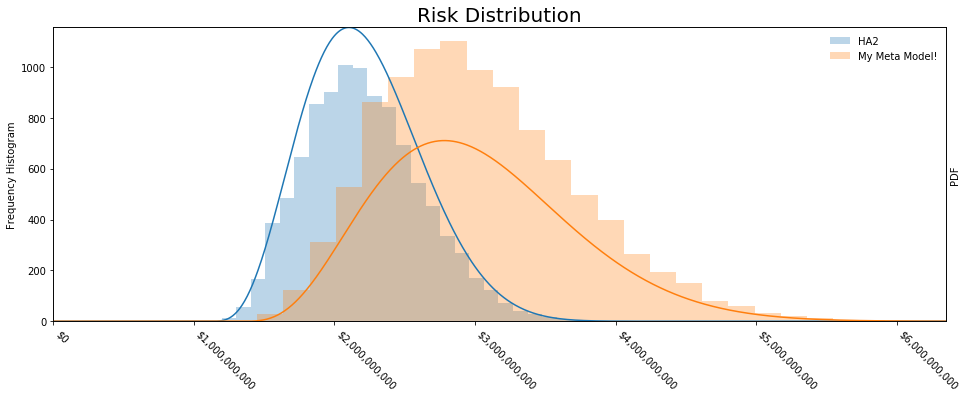

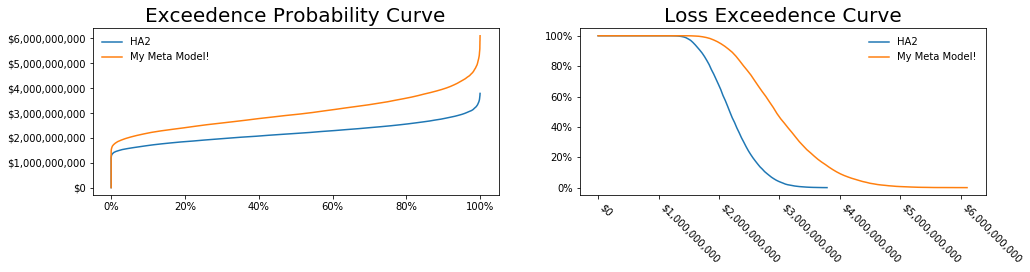

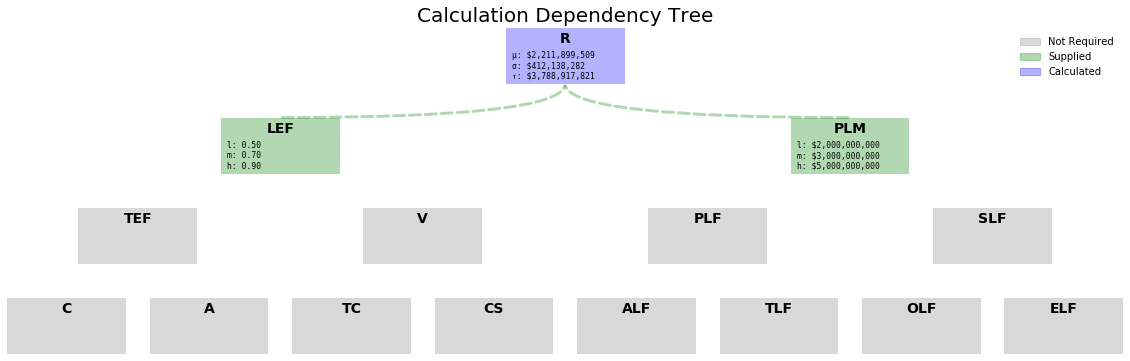

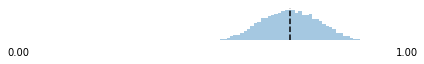

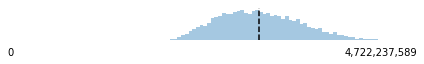

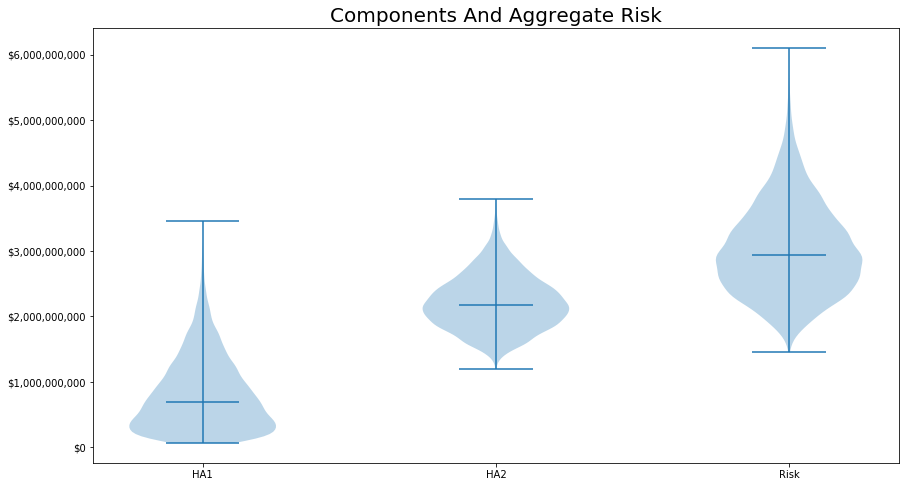

In [4]:
mm = pyfair.FairMetaModel(name='My Meta Model!', models=[model1, model2])
mm.calculate_all()

fsr = pyfair.FairSimpleReport([model2, mm])
fsr.to_html('output.html')

# Components

<section header and metadata>

<section overview>

* Summary General
    * Summary Table (mean, stdev, low, high, n)
    * hist
    * Exceedence curves
* Summary Comparison
    * Summary Table (mean, stdev, low, high, n)
    * Summary Table 2
    * Combined Hist
    * Exceedence curves
    
<section parameters>

* Model Detail
    * Parameter table with distributions
* Metamodel Detail
    * Risk table with stacked area
    
<section> and source code
* JSON

# Reports
* Compare
* Single
* Metamodel Drilldown

In [ ]:

pd.DataFrame({
    model1.get_name(): model1.export_results()['Risk'],
    model2.get_name(): model2.export_results()['Risk'],    
}).agg([np.mean, np.std, np.min, np.max])



In [ ]:
from pyfair.report.distribution import FairDistributionCurve

fdc = FairDistributionCurve([model1, model2, model3])
#fig, ax = fdc.generate_image()

fig, ax = fdc.generate_image()
fdc.generate_icon('HA1', 'Risk')

In [ ]:
from pyfair.report.exceedence import FairExceedenceCurves

fpc = FairExceedenceCurves([model1, model2, model3])
fig1, ax1 = fpc.generate_image()

In [ ]:
'''
FairModel
    Just one
FairAddititveMetaModel
    Add all the risks together and display with components
FairComparativeMetaModel
    Put risks side by side
    
Mu, Sigma for Risk

Model Params

Source
'''